# PyCaret 2 Classification Example
This notebook is created using PyCaret 2.0. Last updated : 28-07-2020

In [1]:
# check version
from pycaret.utils import version
version()

pycaret-nightly-0.38


# 1. Data Repository

In [2]:
from pycaret.datasets import get_data
index = get_data('index')

,Dataset,Data Types,Default Task,Target Variable,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,None,1000,10,N
1,france,Multivariate,Association Rule Mining,"InvoiceNo, Description",8557,8,N
2,germany,Multivariate,Association Rule Mining,"InvoiceNo, Description",9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,683,10,N
6,credit,Multivariate,Classification (Binary),default,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,10000,14,N
9,employee,Multivariate,Classification (Binary),left,14999,10,N


In [3]:
data = get_data('bank')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# 2. Initialize Setup

In [4]:
from pycaret.classification import *
clf1 = setup(data, target = 'deposit', session_id=123, log_experiment=True, experiment_name='bank1')

Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,"no: 0, yes: 1"
3,Original Data,"(45211, 17)"
4,Missing Values,False
5,Numeric Features,7
6,Categorical Features,9
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


# 3. Compare Baseline

In [5]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Gradient Boosting Classifier,0.8944,0.8958,0.3357,0.6025,0.4250,0.3724,0.3946,0.2539
1,Linear Discriminant Analysis,0.8944,0.8967,0.4155,0.5917,0.4798,0.4235,0.4360,0.0201
2,Ridge Classifier,0.8931,0.0000,0.2649,0.6432,0.3591,0.3133,0.3561,0.0054
3,Logistic Regression,0.8925,0.8503,0.2380,0.6689,0.3329,0.2894,0.3427,0.0496
4,CatBoost Classifier,0.8912,0.9044,0.3187,0.6258,0.4110,0.3571,0.3877,3.0343
5,Ada Boost Classifier,0.8868,0.8725,0.3404,0.5429,0.4061,0.3489,0.3662,0.1122
6,Light Gradient Boosting Machine,0.8868,0.8862,0.3462,0.5552,0.4205,0.3613,0.3768,0.1209
7,Extra Trees Classifier,0.8855,0.8791,0.1947,0.5749,0.2785,0.2331,0.2784,0.1507
8,Random Forest Classifier,0.8836,0.8478,0.1836,0.5440,0.2685,0.2211,0.2628,0.1131
9,Extreme Gradient Boosting,0.8836,0.8870,0.3734,0.5219,0.4251,0.3635,0.3746,0.1374


# 4. Create Model

In [6]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8868,0.8808,0.1053,0.6667,0.1818,0.1543,0.2339
1,0.8608,0.8274,0.2222,0.3333,0.2667,0.1931,0.1980
2,0.9177,0.8956,0.4444,0.7273,0.5517,0.5093,0.5281
3,0.8924,0.8571,0.1111,0.6667,0.1905,0.1632,0.2420
4,0.9177,0.8583,0.2778,1.0000,0.4348,0.4053,0.5042
5,0.8987,0.7778,0.1667,0.7500,0.2727,0.2413,0.3227
6,0.8797,0.8788,0.2105,0.5000,0.2963,0.2423,0.2696
7,0.9051,0.8781,0.2105,1.0000,0.3478,0.3194,0.4359
8,0.8797,0.8387,0.3158,0.5000,0.3871,0.3242,0.3347
9,0.8861,0.8107,0.3158,0.5455,0.4000,0.3420,0.3576


In [7]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8428,0.5923,0.2632,0.3125,0.2857,0.1981,0.1990
1,0.8481,0.6964,0.5000,0.3750,0.4286,0.3430,0.3478
2,0.8924,0.7214,0.5000,0.5294,0.5143,0.4538,0.4541
3,0.8861,0.6937,0.4444,0.5000,0.4706,0.4070,0.4079
4,0.8861,0.6452,0.3333,0.5000,0.4000,0.3398,0.3484
5,0.8861,0.7663,0.6111,0.5000,0.5500,0.4855,0.4887
6,0.8228,0.6267,0.3684,0.3043,0.3333,0.2322,0.2336
7,0.8608,0.6937,0.4737,0.4286,0.4500,0.3705,0.3711
8,0.8228,0.6267,0.3684,0.3043,0.3333,0.2322,0.2336
9,0.8671,0.6746,0.4211,0.4444,0.4324,0.3572,0.3574


In [8]:
rf = create_model('rf', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8738,0.7995,0.1081,0.3636,0.1667,0.1196,0.1458
1,0.8956,0.7996,0.1892,0.7000,0.2979,0.2611,0.3277
2,0.8861,0.8452,0.1081,0.5714,0.1818,0.1502,0.2127
3,0.9019,0.8818,0.2703,0.7143,0.3922,0.3504,0.3999
4,0.8892,0.8276,0.2432,0.5625,0.3396,0.2894,0.3199
Mean,0.8893,0.8307,0.1838,0.5824,0.2756,0.2341,0.2812
SD,0.0095,0.0309,0.0671,0.1262,0.0881,0.0866,0.0903


In [9]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors.KNeighborsClassifier,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model.SGDClassifier,True
rbfsvm,SVM - Radial Kernel,sklearn.svm.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process.GPC,False
mlp,MLP Classifier,sklearn.neural_network.MLPClassifier,False
ridge,Ridge Classifier,sklearn.linear_model.RidgeClassifier,True


In [10]:
models(type='ensemble').index.tolist()

['rf', 'ada', 'gbc', 'et', 'xgboost', 'lightgbm', 'catboost']

In [11]:
ensembled_models = compare_models(whitelist = models(type='ensemble').index.tolist(), fold = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,CatBoost Classifier,0.8912,0.8997,0.2918,0.5699,0.3837,0.3311,0.3545,3.8568
1,Extra Trees Classifier,0.8893,0.8844,0.2269,0.5742,0.3215,0.2738,0.3107,0.1506
2,Random Forest Classifier,0.8874,0.8480,0.1997,0.5619,0.2879,0.2426,0.2837,0.1135
3,Ada Boost Classifier,0.8861,0.8365,0.3677,0.5221,0.4310,0.3698,0.3771,0.1061
4,Light Gradient Boosting Machine,0.8843,0.8686,0.3030,0.5123,0.3782,0.3194,0.3340,0.1861
5,Gradient Boosting Classifier,0.8830,0.8747,0.3078,0.5184,0.3817,0.3216,0.3375,0.2017
6,Extreme Gradient Boosting,0.8805,0.8695,0.3462,0.4890,0.4024,0.3386,0.3463,0.1135


# 5. Tune Hyperparameters

In [12]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8994,0.8444,0.2105,0.8000,0.3333,0.2984,0.3780
1,0.8608,0.8274,0.2222,0.3333,0.2667,0.1931,0.1980
2,0.9177,0.8869,0.3889,0.7778,0.5185,0.4789,0.5135
3,0.8987,0.8734,0.1667,0.7500,0.2727,0.2413,0.3227
4,0.9114,0.8571,0.2778,0.8333,0.4167,0.3814,0.4499
5,0.8924,0.7921,0.1111,0.6667,0.1905,0.1632,0.2420
6,0.8797,0.8841,0.2105,0.5000,0.2963,0.2423,0.2696
7,0.9051,0.8773,0.2105,1.0000,0.3478,0.3194,0.4359
8,0.8861,0.8372,0.3158,0.5455,0.4000,0.3420,0.3576
9,0.8924,0.8455,0.3158,0.6000,0.4138,0.3608,0.3834


In [13]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8679,0.9008,0.0000,0.0000,0.0000,-0.0233,-0.0416
1,0.8671,0.8333,0.1667,0.3333,0.2222,0.1583,0.1697
2,0.9114,0.8889,0.2222,1.0000,0.3636,0.3361,0.4495
3,0.8987,0.8629,0.1667,0.7500,0.2727,0.2413,0.3227
4,0.8797,0.8798,0.0000,0.0000,0.0000,-0.0121,-0.0286
5,0.9114,0.9512,0.2222,1.0000,0.3636,0.3361,0.4495
6,0.8797,0.9050,0.0526,0.5000,0.0952,0.0740,0.1322
7,0.8987,0.9040,0.1579,1.0000,0.2727,0.2481,0.3763
8,0.8987,0.8913,0.3158,0.6667,0.4286,0.3807,0.4129
9,0.8861,0.8675,0.2105,0.5714,0.3077,0.2598,0.2987


# 6. Ensemble Model

In [14]:
bagged_dt = ensemble_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8679,0.8071,0.2632,0.4167,0.3226,0.2535,0.2618
1,0.8608,0.8252,0.3889,0.3889,0.3889,0.3103,0.3103
2,0.9051,0.8383,0.2778,0.7143,0.4000,0.3591,0.4068
3,0.8987,0.7948,0.2778,0.6250,0.3846,0.3382,0.3715
4,0.9114,0.8151,0.2778,0.8333,0.4167,0.3814,0.4499
5,0.9177,0.8873,0.4444,0.7273,0.5517,0.5093,0.5281
6,0.8861,0.8332,0.3684,0.5385,0.4375,0.3766,0.3850
7,0.8924,0.8794,0.4737,0.5625,0.5143,0.4543,0.4564
8,0.8608,0.8381,0.3158,0.4000,0.3529,0.2761,0.2786
9,0.8861,0.8410,0.3684,0.5385,0.4375,0.3766,0.3850


In [15]:
boosted_dt = ensemble_model(dt, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8428,0.6150,0.3158,0.3333,0.3243,0.2354,0.2355
1,0.8354,0.6651,0.4444,0.3333,0.3810,0.2883,0.2923
2,0.8987,0.7492,0.5556,0.5556,0.5556,0.4984,0.4984
3,0.8797,0.6901,0.4444,0.4706,0.4571,0.3896,0.3898
4,0.8797,0.6417,0.3333,0.4615,0.3871,0.3223,0.3276
5,0.8924,0.7698,0.6111,0.5238,0.5641,0.5031,0.5051
6,0.8165,0.6458,0.4211,0.3077,0.3556,0.2516,0.2558
7,0.8608,0.6937,0.4737,0.4286,0.4500,0.3705,0.3711
8,0.8291,0.6075,0.3158,0.3000,0.3077,0.2103,0.2104
9,0.8544,0.6446,0.3684,0.3889,0.3784,0.2960,0.2961


# 7. Blend Models

In [16]:
blender = blend_models(estimator_list = [boosted_dt, bagged_dt, tuned_rf], method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8805,0.8549,0.3158,0.5000,0.3871,0.3246,0.3352
1,0.8481,0.8556,0.3889,0.3500,0.3684,0.2824,0.2829
2,0.8861,0.9111,0.3889,0.5000,0.4375,0.3752,0.3789
3,0.8671,0.8738,0.2222,0.3636,0.2759,0.2074,0.2150
4,0.9051,0.8631,0.2778,0.7143,0.4000,0.3591,0.4068
5,0.9051,0.9401,0.5000,0.6000,0.5455,0.4929,0.4955
6,0.8734,0.8671,0.4211,0.4706,0.4444,0.3733,0.3740
7,0.8734,0.9027,0.4737,0.4737,0.4737,0.4017,0.4017
8,0.8608,0.8682,0.3158,0.4000,0.3529,0.2761,0.2786
9,0.8734,0.8663,0.3684,0.4667,0.4118,0.3419,0.3449


# 8. Stack Models

In [17]:
stacker = stack_models(estimator_list = [boosted_dt,bagged_dt,tuned_rf], meta_model=rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8742,0.7880,0.1579,0.4286,0.2308,0.1779,0.2045
1,0.8797,0.8206,0.3889,0.4667,0.4242,0.3577,0.3596
2,0.8924,0.8841,0.2222,0.5714,0.3200,0.2737,0.3100
3,0.8734,0.8663,0.2222,0.4000,0.2857,0.2224,0.2340
4,0.9114,0.8875,0.3333,0.7500,0.4615,0.4209,0.4623
5,0.9051,0.8579,0.2222,0.8000,0.3478,0.3138,0.3904
6,0.8924,0.7923,0.3158,0.6000,0.4138,0.3608,0.3834
7,0.8987,0.9146,0.4737,0.6000,0.5294,0.4736,0.4777
8,0.8734,0.8516,0.2632,0.4545,0.3333,0.2689,0.2811
9,0.8544,0.8228,0.1579,0.3000,0.2069,0.1352,0.1436


# 9. Analyze Model

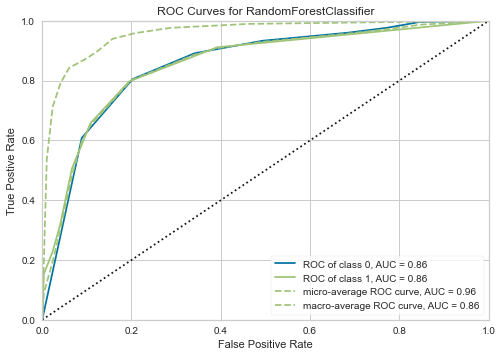

In [18]:
plot_model(rf)

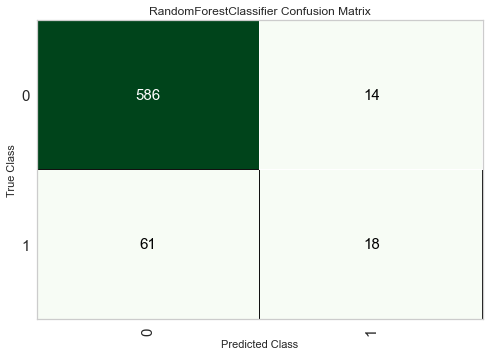

In [19]:
plot_model(rf, plot = 'confusion_matrix')

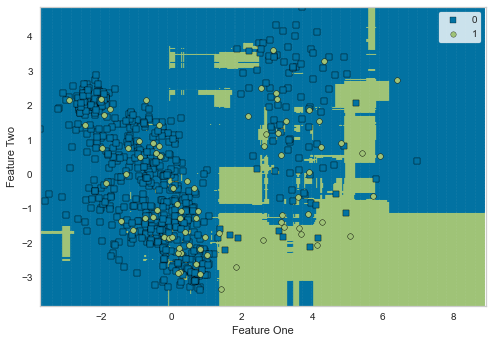

In [20]:
plot_model(rf, plot = 'boundary')

In [21]:
evaluate_model(rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# 10. Interpret Model

In [22]:
catboost = create_model('catboost', cross_validation=False)

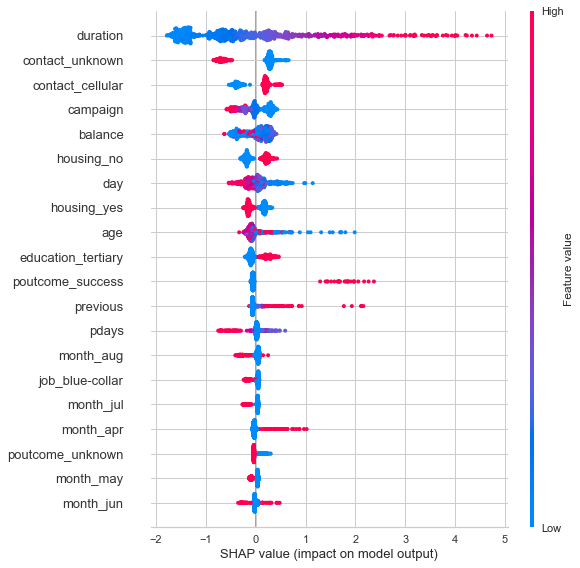

In [23]:
interpret_model(catboost)

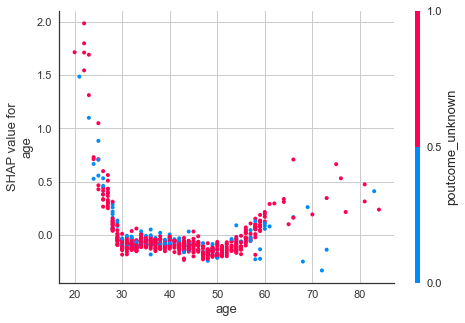

In [24]:
interpret_model(catboost, plot = 'correlation')

In [25]:
interpret_model(catboost, plot = 'reason', observation = 12)

# 11. AutoML()

In [26]:
best = automl(optimize = 'Recall')
best

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

# 12. Predict Model

In [27]:
pred_holdouts = predict_model(lr)
pred_holdouts.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8792,0.8683,0.1772,0.4516,0.2545,0.2022,0.2287


,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,deposit,Label,Score
0,33.0,12704.0,21.0,246.0,2.0,-1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.0441
1,51.0,730.0,18.0,287.0,2.0,-1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.0281
2,50.0,19447.0,21.0,166.0,1.0,-1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.0207
3,48.0,545.0,6.0,307.0,1.0,-1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.0674
4,48.0,427.0,14.0,201.0,1.0,-1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.0269


In [28]:
new_data = data.copy()
new_data.drop(['deposit'], axis=1, inplace=True)
predict_new = predict_model(best, data=new_data)
predict_new.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Label,Score
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0,0.0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0,0.0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0,0.0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0,0.0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0,0.0


# 13. Save / Load Model

In [29]:
save_model(best, model_name='best-model')

Transformation Pipeline and Model Succesfully Saved


In [30]:
loaded_bestmodel = load_model('best-model')
print(loaded_bestmodel)

Transformation Pipeline and Model Sucessfully Loaded
[Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='deposit',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                numeric_strategy='mean',
                                target_variable=None)),
                ('new_levels1',
                 New_Catagorical_Le...
                ('group', Empty()), ('nonliner', Empty()), ('scaling', Empty()),
                ('P_transform', Empty()), ('pt_target', Empty()),
                ('binn', Empty()), ('rem_outliers', Empty()),
                ('cluster_all', Empty()), ('dummy', Dummify(t

In [31]:
from sklearn import set_config
set_config(display='diagram')
loaded_bestmodel[0]

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='deposit',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                numeric_strategy='mean',
                                target_variable=None)),
                ('new_levels1',
                 New_Catagorical_Le...
                ('group', Empty()), ('nonliner', Empty()), ('scaling', Empty()),
                ('P_transform', Empty()), ('pt_target', Empty()),
                ('binn', Empty()), ('rem_outliers', Empty()),
                ('cluster_all', Empty()), ('dummy', Dummify(target='deposit')),
                ('fix_perfect', Empty()), ('clean_names', Clean_Colum_Names()),
                ('feature_select', Empty()), ('fix_multi', Empty()),
                ('dfs', Empty()), ('pca', Empty())],
         verbose=False)

In [32]:
from sklearn import set_config
set_config(display='text')

# 14. Deploy Model

In [33]:
deploy_model(best, model_name = 'best-aws', authentication = {'bucket' : 'pycaret-test'})

Model Succesfully Deployed on AWS S3


# 15. Get Config / Set Config

In [34]:
X_train = get_config('X_train')
X_train.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
22860,32.0,230.0,25.0,256.0,8.0,-1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
45154,63.0,3738.0,9.0,301.0,1.0,456.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
39204,56.0,95.0,18.0,428.0,2.0,-1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
38864,33.0,-52.0,18.0,278.0,1.0,-1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
22223,35.0,905.0,21.0,114.0,2.0,-1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [35]:
get_config('seed')

123

In [36]:
from pycaret.classification import set_config
set_config('seed', 999)

In [37]:
get_config('seed')

999

# 16. Get System Logs

In [38]:
get_system_logs()

['2020-07-28 12', '03', '01,414', 'INFO', 'PyCaret Classification Module']
['2020-07-28 12', '03', '01,414', 'INFO', 'version pycaret-nightly-0.38']
['2020-07-28 12', '03', '01,414', 'INFO', 'Initializing setup()']
['2020-07-28 12', '03', '01,414', 'INFO', 'USI', 'e35e']
['2020-07-28 12', '03', '01,415', 'INFO', 'setup(data=(45211, 17), target=deposit, train_size=0.7, sampling=True, sample_estimator=None, categorical_features=None, categorical_imputation=constant, ordinal_features=None,']
['high_cardinality_features=None, high_cardinality_method=frequency, numeric_features=None, numeric_imputation=mean, date_features=None, ignore_features=None, normalize=False,']
['normalize_method=zscore, transformation=False, transformation_method=yeo-johnson, handle_unknown_categorical=True, unknown_categorical_method=least_frequent, pca=False, pca_method=linear,']
['pca_components=None, ignore_low_variance=False, combine_rare_levels=False, rare_level_threshold=0.1, bin_numeric_features=None, remove

["('imputer',"]
["Simple_Imputer(categorical_strategy='not_available',"]
["numeric_strategy='mean',"]
['target_variable=None)),']
["('new_levels1',"]
['New_Catagorical_Le...']
["('group', Empty()), ('nonliner', Empty()), ('scaling', Empty()),"]
["('P_transform', Empty()), ('pt_target', Empty()),"]
["('binn', Empty()), ('rem_outliers', Empty()),"]
["('cluster_all', Empty()), ('dummy', Dummify(target='deposit')),"]
["('fix_perfect', Empty()), ('clean_names', Clean_Colum_Names()),"]
["('feature_select', Empty()), ('fix_multi', Empty()),"]
["('dfs', Empty()), ('pca', Empty())],"]
['verbose=False), LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,']
["solver='svd', store_covariance=False, tol=0.0001)]"]
['2020-07-28 12', '04', '06,291', 'INFO', 'save_model() succesfully completed......................................']
['2020-07-28 12', '04', '06,291', 'INFO', 'SubProcess save_model() end ==================================']
['2020-07-28 12', '04', '06,335', 'INFO',

['min_impurity_split=None,']
['min_samples_leaf=1,']
['min_samples_split=2,']
['min_weight_fraction_leaf=0.0,']
["presort='deprecated',"]
['random_state=123,']
["splitter='best'),"]
['bootstrap=True, bootstrap_features=False, max_features=1.0,']
['max_samples=1.0, n_estimators=10, n_jobs=-1, oob_score=False,']
['random_state=123, verbose=0, warm_start=False)']
['2020-07-28 12', '07', '18,350', 'INFO', 'ensemble_model() succesfully completed......................................']
['2020-07-28 12', '07', '18,360', 'INFO', 'Initializing ensemble_model()']
['2020-07-28 12', '07', '18,362', 'INFO', "ensemble_model(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',"]
['max_depth=None, max_features=None, max_leaf_nodes=None,']
['min_impurity_decrease=0.0, min_impurity_split=None,']
['min_samples_leaf=1, min_samples_split=2,']
["min_weight_fraction_leaf=0.0, presort='deprecated',"]
["random_state=123, splitter='best'), method=Boosting, fold=10, n_estimators=1

['2020-07-28 12', '13', '52,286', 'INFO', 'Trained Model.pkl saved in current working directory']
['2020-07-28 12', '13', '52,290', 'INFO', '[Pipeline(memory=None,']
["steps=[('dtypes',"]
['DataTypes_Auto_infer(categorical_features=[],']
['display_types=True, features_todrop=[],']
["ml_usecase='classification',"]
["numerical_features=[], target='deposit',"]
['time_features=[])),']
["('imputer',"]
["Simple_Imputer(categorical_strategy='not_available',"]
["numeric_strategy='mean',"]
['target_variable=None)),']
["('new_levels1',"]
['New_Catagorical_Le...']
["('group', Empty()), ('nonliner', Empty()), ('scaling', Empty()),"]
["('P_transform', Empty()), ('pt_target', Empty()),"]
["('binn', Empty()), ('rem_outliers', Empty()),"]
["('cluster_all', Empty()), ('dummy', Dummify(target='deposit')),"]
["('fix_perfect', Empty()), ('clean_names', Clean_Colum_Names()),"]
["('feature_select', Empty()), ('fix_multi', Empty()),"]
["('dfs', Empty()), ('pca', Empty())],"]
["verbose=False), AdaBoostClassif

['2020-07-28 12', '14', '45,475', 'INFO', 'tune_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,']
["criterion='gini', max_depth=None, max_features='auto',"]
['max_leaf_nodes=None, max_samples=None,']
['min_impurity_decrease=0.0, min_impurity_split=None,']
['min_samples_leaf=1, min_samples_split=2,']
['min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,']
['oob_score=False, random_state=123, verbose=0,']
['warm_start=False), fold=10, round=4, n_iter=10, custom_grid=None, optimize=Accuracy, choose_better=False, verbose=True)']
['2020-07-28 12', '14', '45,475', 'INFO', 'Checking exceptions']
['2020-07-28 12', '14', '45,478', 'INFO', 'Preloading libraries']
['2020-07-28 12', '14', '45,478', 'INFO', 'Preparing display monitor']
['2020-07-28 12', '14', '45,503', 'INFO', 'Copying training dataset']
['2020-07-28 12', '14', '45,505', 'INFO', 'Importing libraries']
['2020-07-28 12', '14', '45,505', 'INFO', 'Checking base model']
['2020-07-28 12', '1

['min_samples_leaf=1,']
['min_samples_split=2,']
['min_weight_fraction_leaf=0.0,']
["presort='deprecated',"]
['random_state=123,']
["splitter='best'),"]
['learning_rate=1.0, n_estimators=10, random_state=123), BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,']
['class_weight=None,']
["criterion='gini',"]
['max_depth=None,']
['max_features=None,']
['max_leaf_nodes=None,']
['min_impurity_decrease=0.0,']
['min_impurity_split=None,']
['min_samples_leaf=1,']
['min_samples_split=2,']
['min_weight_fraction_leaf=0.0,']
["presort='deprecated',"]
['random_state=123,']
["splitter='best'),"]
['bootstrap=True, bootstrap_features=False, max_features=1.0,']
['max_samples=1.0, n_estimators=10, n_jobs=-1, oob_score=False,']
['random_state=123, verbose=0, warm_start=False), RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,']
["criterion='gini', max_depth=80, max_features='log2',"]
['max_leaf_nodes=None, max_samples=None,']
['min_impurity_decrease=0.0, min_imp

['2020-07-28 12', '38', '55,168', 'INFO', 'Initializing Fold 1']
['2020-07-28 12', '38', '55,174', 'INFO', 'Fitting Model']
['2020-07-28 12', '38', '55,286', 'INFO', 'Evaluating Metrics']
['2020-07-28 12', '38', '55,521', 'INFO', 'Compiling Metrics']
['2020-07-28 12', '38', '55,526', 'INFO', 'Initializing Fold 2']
['2020-07-28 12', '38', '55,532', 'INFO', 'Fitting Model']
['2020-07-28 12', '38', '55,645', 'INFO', 'Evaluating Metrics']
['2020-07-28 12', '38', '55,871', 'INFO', 'Compiling Metrics']
['2020-07-28 12', '38', '55,880', 'INFO', 'Initializing Fold 3']
['2020-07-28 12', '38', '55,888', 'INFO', 'Fitting Model']
['2020-07-28 12', '38', '56,002', 'INFO', 'Evaluating Metrics']
['2020-07-28 12', '38', '56,225', 'INFO', 'Compiling Metrics']
['2020-07-28 12', '38', '56,229', 'INFO', 'Initializing Fold 4']
['2020-07-28 12', '38', '56,235', 'INFO', 'Fitting Model']
['2020-07-28 12', '38', '56,347', 'INFO', 'Evaluating Metrics']
['2020-07-28 12', '38', '56,579', 'INFO', 'Compiling Metric

['2020-07-28 12', '40', '10,390', 'INFO', 'Creating MLFlow logs']
['2020-07-28 12', '40', '10,464', 'INFO', 'SubProcess save_model() called ==================================']
['2020-07-28 12', '40', '10,464', 'INFO', 'Initializing save_model()']
['2020-07-28 12', '40', '10,464', 'INFO', 'save_model(model=<catboost.core.CatBoostClassifier object at 0x0000014F18418748>, model_name=Trained Model, verbose=False)']
['2020-07-28 12', '40', '10,464', 'INFO', 'Appending prep pipeline']
['2020-07-28 12', '40', '10,477', 'INFO', 'Trained Model.pkl saved in current working directory']
['2020-07-28 12', '40', '10,483', 'INFO', '[Pipeline(memory=None,']
["steps=[('dtypes',"]
['DataTypes_Auto_infer(categorical_features=[],']
['display_types=True, features_todrop=[],']
["ml_usecase='classification',"]
["numerical_features=[], target='deposit',"]
['time_features=[])),']
["('imputer',"]
["Simple_Imputer(categorical_strategy='not_available',"]
["numeric_strategy='mean',"]
['target_variable=None)),']
[

['2020-07-28 12', '48', '10,295', 'INFO', 'Fitting Model']
['2020-07-28 12', '48', '10,311', 'INFO', 'Evaluating Metrics']
['2020-07-28 12', '48', '10,320', 'INFO', 'Compiling Metrics']
['2020-07-28 12', '48', '10,325', 'INFO', 'Initializing Fold 6']
['2020-07-28 12', '48', '10,333', 'INFO', 'Fitting Model']
['2020-07-28 12', '48', '10,349', 'INFO', 'Evaluating Metrics']
['2020-07-28 12', '48', '10,357', 'INFO', 'Compiling Metrics']
['2020-07-28 12', '48', '10,362', 'INFO', 'Initializing Fold 7']
['2020-07-28 12', '48', '10,367', 'INFO', 'Fitting Model']
['2020-07-28 12', '48', '10,383', 'INFO', 'Evaluating Metrics']
['2020-07-28 12', '48', '10,392', 'INFO', 'Compiling Metrics']
['2020-07-28 12', '48', '10,398', 'INFO', 'Initializing Fold 8']
['2020-07-28 12', '48', '10,404', 'INFO', 'Fitting Model']
['2020-07-28 12', '48', '10,421', 'INFO', 'Evaluating Metrics']
['2020-07-28 12', '48', '10,430', 'INFO', 'Compiling Metrics']
['2020-07-28 12', '48', '10,435', 'INFO', 'Initializing Fold 

["steps=[('dtypes',"]
['DataTypes_Auto_infer(categorical_features=[],']
['display_types=True, features_todrop=[],']
["ml_usecase='classification',"]
["numerical_features=[], target='deposit',"]
['time_features=[])),']
["('imputer',"]
["Simple_Imputer(categorical_strategy='not_available',"]
["numeric_strategy='mean',"]
['target_variable=None)),']
["('new_levels1',"]
['New_Catagorical_Le...']
["('group', Empty()), ('nonliner', Empty()), ('scaling', Empty()),"]
["('P_transform', Empty()), ('pt_target', Empty()),"]
["('binn', Empty()), ('rem_outliers', Empty()),"]
["('cluster_all', Empty()), ('dummy', Dummify(target='deposit')),"]
["('fix_perfect', Empty()), ('clean_names', Clean_Colum_Names()),"]
["('feature_select', Empty()), ('fix_multi', Empty()),"]
["('dfs', Empty()), ('pca', Empty())],"]
['verbose=False), RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,']
["criterion='gini', max_depth=None, max_features='auto',"]
['max_leaf_nodes=None, max_samples=None,']
['mi

['min_samples_split=2,']
['min_weight_fraction_leaf=0.0,']
["presort='deprecated',"]
['random_state=123,']
["splitter='best'),"]
['learning_rate=1.0,']
['n_estimators=10,']
['random_state=123))],']
['flatten_transform=True, n_jobs=-1, verbose=False,']
["voting='soft', weights=None), model_name=Trained Model, verbose=False)"]
['2020-07-28 12', '51', '32,179', 'INFO', 'Appending prep pipeline']
['2020-07-28 12', '51', '32,234', 'INFO', 'Trained Model.pkl saved in current working directory']
['2020-07-28 12', '51', '32,254', 'INFO', '[Pipeline(memory=None,']
["steps=[('dtypes',"]
['DataTypes_Auto_infer(categorical_features=[],']
['display_types=True, features_todrop=[],']
["ml_usecase='classification',"]
["numerical_features=[], target='deposit',"]
['time_features=[])),']
["('imputer',"]
["Simple_Imputer(categorical_strategy='not_available',"]
["numeric_strategy='mean',"]
['target_variable=None)),']
["('new_levels1',"]
['New_Catagorical_Le...']
["('group', Empty()), ('nonliner', Empty()),

['2020-07-28 13', '06', '20,234', 'INFO', 'Evaluating Metrics']
['2020-07-28 13', '06', '20,251', 'INFO', 'Compiling Metrics']
['2020-07-28 13', '06', '20,260', 'INFO', 'Initializing Fold 6']
['2020-07-28 13', '06', '20,274', 'INFO', 'Fitting Model']
['2020-07-28 13', '06', '20,309', 'INFO', 'Evaluating Metrics']
['2020-07-28 13', '06', '20,326', 'INFO', 'Compiling Metrics']
['2020-07-28 13', '06', '20,336', 'INFO', 'Initializing Fold 7']
['2020-07-28 13', '06', '20,350', 'INFO', 'Fitting Model']
['2020-07-28 13', '06', '20,387', 'INFO', 'Evaluating Metrics']
['2020-07-28 13', '06', '20,405', 'INFO', 'Compiling Metrics']
['2020-07-28 13', '06', '20,414', 'INFO', 'Initializing Fold 8']
['2020-07-28 13', '06', '20,429', 'INFO', 'Fitting Model']
['2020-07-28 13', '06', '20,465', 'INFO', 'Evaluating Metrics']
['2020-07-28 13', '06', '20,483', 'INFO', 'Compiling Metrics']
['2020-07-28 13', '06', '20,492', 'INFO', 'Initializing Fold 9']
['2020-07-28 13', '06', '20,508', 'INFO', 'Fitting Mode

['normalize_method=zscore, transformation=False, transformation_method=yeo-johnson, handle_unknown_categorical=True, unknown_categorical_method=least_frequent, pca=False, pca_method=linear,']
['pca_components=None, ignore_low_variance=False, combine_rare_levels=False, rare_level_threshold=0.1, bin_numeric_features=None, remove_outliers=False, outliers_threshold=0.05,']
['remove_multicollinearity=False, multicollinearity_threshold=0.9, remove_perfect_collinearity=False, create_clusters=False, cluster_iter=20,']
['polynomial_features=False, polynomial_degree=2, trigonometry_features=False, polynomial_threshold=0.1, group_features=None,']
['group_names=None, feature_selection=False, feature_selection_threshold=0.8, feature_interaction=False, feature_ratio=False, interaction_threshold=0.01,']
['fix_imbalance=False, fix_imbalance_method=None, data_split_shuffle=True, folds_shuffle=False, n_jobs=-1, html=True, session_id=123, log_experiment=True,']
['experiment_name=bank1, log_plots=False, l

['min_samples_leaf=1, min_samples_split=2,']
['min_weight_fraction_leaf=0.0, n_estimators=100,']
["n_iter_no_change=None, presort='deprecated',"]
['random_state=123, subsample=1.0, tol=0.0001,']
['validation_fraction=0.1, verbose=0,']
['warm_start=False), model_name=Trained Model, verbose=False)']
['2020-07-28 13', '09', '38,767', 'INFO', 'Appending prep pipeline']
['2020-07-28 13', '09', '38,776', 'INFO', 'Trained Model.pkl saved in current working directory']
['2020-07-28 13', '09', '38,782', 'INFO', '[Pipeline(memory=None,']
["steps=[('dtypes',"]
['DataTypes_Auto_infer(categorical_features=[],']
['display_types=True, features_todrop=[],']
["ml_usecase='classification',"]
["numerical_features=[], target='deposit',"]
['time_features=[])),']
["('imputer',"]
["Simple_Imputer(categorical_strategy='not_available',"]
["numeric_strategy='mean',"]
['target_variable=None)),']
["('new_levels1',"]
['New_Catagorical_Le...']
["('group', Empty()), ('nonliner', Empty()), ('scaling', Empty()),"]
["(

['2020-07-28 13', '10', '36,666', 'INFO', 'Evaluating Metrics']
['2020-07-28 13', '10', '36,903', 'INFO', 'Compiling Metrics']
['2020-07-28 13', '10', '36,917', 'INFO', 'Initializing Fold 2']
['2020-07-28 13', '10', '36,927', 'INFO', 'Fitting Model']
['2020-07-28 13', '10', '37,077', 'INFO', 'Evaluating Metrics']
['2020-07-28 13', '10', '37,305', 'INFO', 'Compiling Metrics']
['2020-07-28 13', '10', '37,312', 'INFO', 'Initializing Fold 3']
['2020-07-28 13', '10', '37,317', 'INFO', 'Fitting Model']
['2020-07-28 13', '10', '37,465', 'INFO', 'Evaluating Metrics']
['2020-07-28 13', '10', '37,682', 'INFO', 'Compiling Metrics']
['2020-07-28 13', '10', '37,688', 'INFO', 'Calculating mean and std']
['2020-07-28 13', '10', '37,688', 'INFO', 'Creating metrics dataframe']
['2020-07-28 13', '10', '37,700', 'INFO', 'Creating MLFlow logs']
['2020-07-28 13', '10', '37,776', 'INFO', 'SubProcess save_model() called ==================================']
['2020-07-28 13', '10', '37,776', 'INFO', 'Initializ

['min_samples_leaf=1, min_samples_split=2,']
['min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,']
['oob_score=False, random_state=123, verbose=0,']
["warm_start=False), 'soft', True], model_name=Trained Model, verbose=False)"]
['2020-07-28 13', '11', '58,164', 'INFO', 'Appending prep pipeline']
['2020-07-28 13', '11', '58,187', 'INFO', 'Trained Model.pkl saved in current working directory']
['2020-07-28 13', '11', '58,193', 'INFO', '[Pipeline(memory=None,']
["steps=[('dtypes',"]
['DataTypes_Auto_infer(categorical_features=[],']
['display_types=True, features_todrop=[],']
["ml_usecase='classification',"]
["numerical_features=[], target='deposit',"]
['time_features=[])),']
["('imputer',"]
["Simple_Imputer(categorical_strategy='not_available',"]
["numeric_strategy='mean',"]
['target_variable=None)),']
["('new_levels1',"]
['New_Catagorical_Le...']
["('group', Empty()), ('nonliner', Empty()), ('scaling', Empty()),"]
["('P_transform', Empty()), ('pt_target', Empty()),"]
["('binn', E

['target_variable=None)),']
["('new_levels1',"]
['New_Catagorical_Le...']
["('group', Empty()), ('nonliner', Empty()), ('scaling', Empty()),"]
["('P_transform', Empty()), ('pt_target', Empty()),"]
["('binn', Empty()), ('rem_outliers', Empty()),"]
["('cluster_all', Empty()), ('dummy', Dummify(target='deposit')),"]
["('fix_perfect', Empty()), ('clean_names', Clean_Colum_Names()),"]
["('feature_select', Empty()), ('fix_multi', Empty()),"]
["('dfs', Empty()), ('pca', Empty())],"]
['verbose=False), RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,']
["max_iter=None, normalize=False, random_state=123, solver='auto',"]
['tol=0.001)]']
['2020-07-28 13', '24', '02,566', 'INFO', 'save_model() succesfully completed......................................']
['2020-07-28 13', '24', '02,566', 'INFO', 'SubProcess save_model() end ==================================']
['2020-07-28 13', '24', '02,611', 'INFO', 'Initializing Random Forest Classifier']
['2020-07-28 13', '24', '0

['2020-07-28 13', '24', '58,955', 'INFO', 'Initializing Random Forest Classifier']
['2020-07-28 13', '24', '58,962', 'INFO', 'Initializing Fold 1']
['2020-07-28 13', '24', '58,970', 'INFO', 'Fitting Model']
['2020-07-28 13', '24', '59,083', 'INFO', 'Evaluating Metrics']
['2020-07-28 13', '24', '59,316', 'INFO', 'Compiling Metrics']
['2020-07-28 13', '24', '59,322', 'INFO', 'Initializing Fold 2']
['2020-07-28 13', '24', '59,327', 'INFO', 'Fitting Model']
['2020-07-28 13', '24', '59,441', 'INFO', 'Evaluating Metrics']
['2020-07-28 13', '24', '59,662', 'INFO', 'Compiling Metrics']
['2020-07-28 13', '24', '59,667', 'INFO', 'Initializing Fold 3']
['2020-07-28 13', '24', '59,672', 'INFO', 'Fitting Model']
['2020-07-28 13', '24', '59,784', 'INFO', 'Evaluating Metrics']
['2020-07-28 13', '25', '00,029', 'INFO', 'Compiling Metrics']
['2020-07-28 13', '25', '00,035', 'INFO', 'Calculating mean and std']
['2020-07-28 13', '25', '00,035', 'INFO', 'Creating metrics dataframe']
['2020-07-28 13', '25'

['random_state=123,']
["splitter='best'),"]
['learning_rate=1.0, n_estimators=10, random_state=123)']
['2020-07-28 13', '26', '11,894', 'INFO', 'ensemble_model() succesfully completed......................................']
['2020-07-28 13', '26', '11,899', 'INFO', 'Initializing blend_models()']
['2020-07-28 13', '26', '11,902', 'INFO', "blend_models(estimator_list=[AdaBoostClassifier(algorithm='SAMME.R',"]
['base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,']
['class_weight=None,']
["criterion='gini',"]
['max_depth=None,']
['max_features=None,']
['max_leaf_nodes=None,']
['min_impurity_decrease=0.0,']
['min_impurity_split=None,']
['min_samples_leaf=1,']
['min_samples_split=2,']
['min_weight_fraction_leaf=0.0,']
["presort='deprecated',"]
['random_state=123,']
["splitter='best'),"]
['learning_rate=1.0, n_estimators=10, random_state=123), BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,']
['class_weight=None,']
["criterion='gini',"]
['max_depth=None,']
['max_featu

# 17. MLFlow UI

In [39]:
!mlflow ui

Running the mlflow server failed. Please see the logs above for details.


# End
Thank you. For more information / tutorials on PyCaret, please visit https://www.pycaret.org